In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('datasets/data_weight_height.csv')

In [56]:
# df = pd.DataFrame(dataset)
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [57]:
df.iloc[:,:-1]

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [58]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['Gender'] = labelencoder.fit_transform(df['Gender'])
# Mengubah data categorical
# Male = 1, Female = 0


In [59]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [60]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

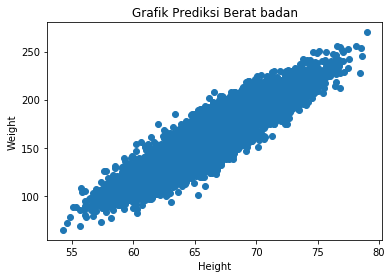

In [61]:
plt.scatter(df.Height, df.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Grafik Prediksi Berat badan")
plt.show()

#### Membagi Data

In [62]:
# X = df.Height[:,np.newaxis] # reshape
# x = df.iloc[:,:-1].values
X = df[['Gender','Height']]
# X = X.reshape(1,-1)
X
# X = X.set_index(['Gender','Height'])
y = df['Weight']
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

#### Fitting Data

In [63]:
model = LinearRegression()
model.fit(df[['Gender','Height']],df.Weight)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
model.predict([[1,74.110105]])

array([217.40594998])

In [65]:
model.coef_

array([19.37771052,  5.97694123])

In [66]:
model.intercept_

-244.9235025206996

In [67]:
x = df.drop(['Weight'],axis=1).values
y = df['Weight']

In [68]:
print(x)

[[ 1.         73.84701702]
 [ 1.         68.78190405]
 [ 1.         74.11010539]
 ...
 [ 0.         63.86799221]
 [ 0.         69.03424313]
 [ 0.         61.94424588]]


In [69]:
print(y)

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64


#### Training

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [71]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
acc = model.score(x_test, y_test)

In [73]:
print(f'Akurasi Model: {acc*100}%')

Akurasi Model: 90.53057316017392%


In [74]:
model.predict([[1,61.0235]])

array([139.18808102])

In [75]:
y_pred = model1.predict(x_test)
print(y_pred)

[141.93828842 176.55658781 219.77836195 ... 149.97129636 166.83374903
 138.87940678]


In [76]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9052889824534558

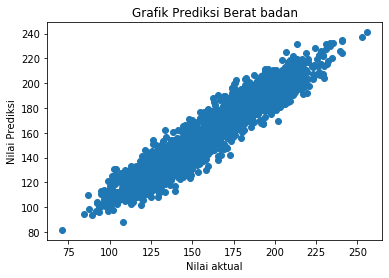

In [77]:
plt.scatter(y_test, y_pred)
# plt.plot(x_test, y_pred)
plt.xlabel('Nilai aktual')
plt.ylabel('Nilai Prediksi')
plt.title("Grafik Prediksi Berat badan")
plt.show()

In [78]:
import joblib

joblib.dump(model,'model1.pkl')

['model1.pkl']

### Deployment Model

In [80]:
import joblib

model = joblib.load("model1.pkl")

print("Input Gender:\n[0] Female\n[1] Male\n")
data_input1 = int(input("Gender : "))
data_input2 = float(input("Height : "))
height = data_input2*0.39370

hasil = model.predict([[data_input1, height]])
print("Hasil prediksi: ", (hasil//2.2046),'Kg') 

Input Gender:
[0] Female
[1] Male

Gender : 1
Height : 23
Hasil prediksi:  [-78.] Kg
